# <center> Extra Courses : Beautiful Soup </center>

klik untuk [Open in colab](https://colab.research.google.com/github/ferdinand-winstein/py-dts/blob/master/2022/Extra%20Courses/BeautifulSoup/Python%20Extra%20Courses%20-%20BeautifulSoup.ipynb) 

# Apa itu Web Scraping?

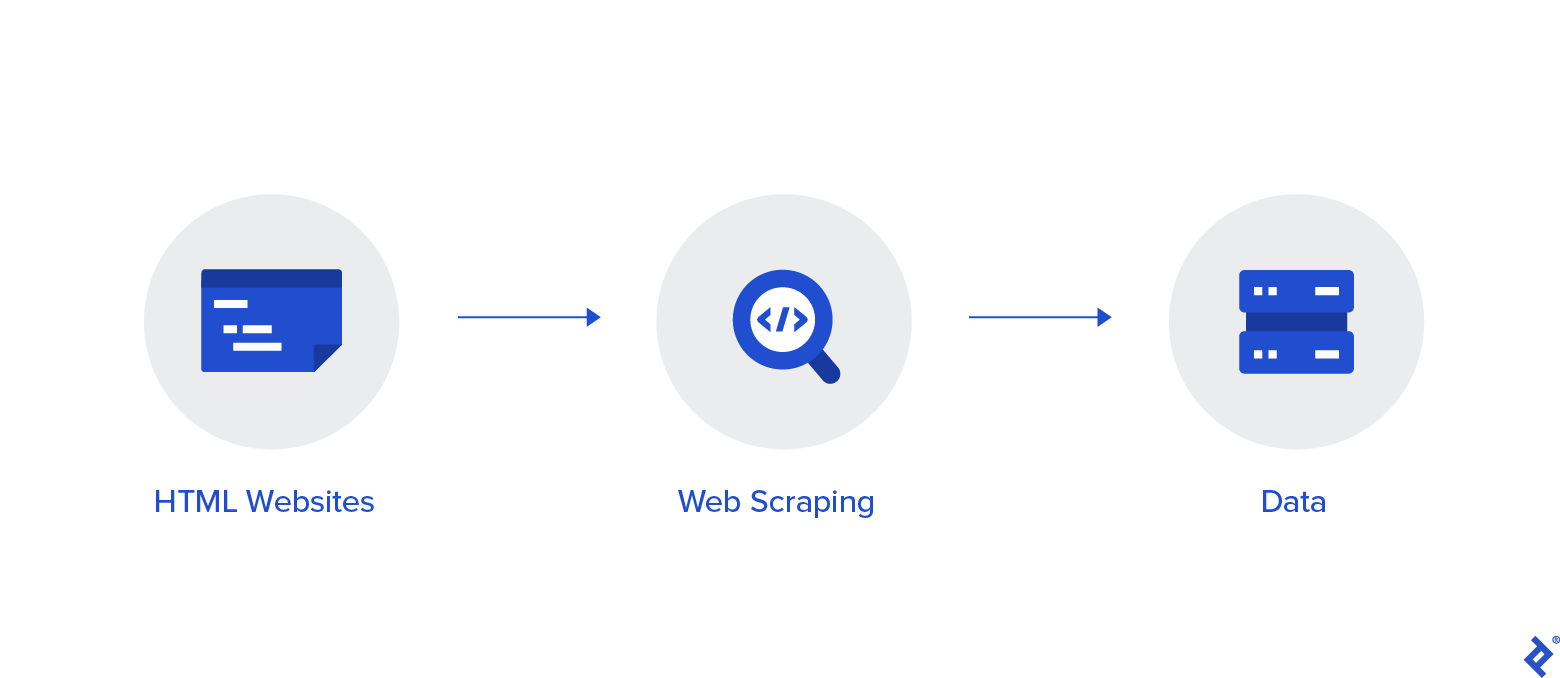
Web scraping, web harvesting, atau web data extraction merupakan kegiatan yang dilakukan untuk mengambil data tertentu secara semi-terstruktur dari sebuah halaman situs web. Halaman tersebut umumnya dibangun menggunakan bahasa markup seperti HTML atau XHTML, proses akan menganalisis dokumen sebelum memulai mengambil data.

Biasanya teknik scraping diimplementasikan pada sebuah bot agar bisa membuat proses yang harusnya dilakukan secara manual menjadi otomatis. Ketika kita menjumpai sebuah situs yang membatasi kuota API (application programming interface) atau bahkan tidak menyediakan sama sekali, maka perayapan web akan sangat dibutuhkan sebagai langkah pengambilan data.

# Metode Web Scraping

## Human copy-and-paste
Metode paling sederhana dan paling mudah yaitu melakukan copy dan paster suatu data dari web secara manual. Terkadang teknologi web scraping tidak bisa menggantikan metode ini karena evaluasi dan akurasi dari "Human"-nya. Atau terkadang website tersebut melakukan tindakan preventif agar tidak bisa dilakukan scraping .

## Text pattern matching
Mengekstrat data teks dari suatu web menggunakan command UNIX atau regex. Biasanya dikombinasikan dengan bahasa pemrograman lain seperti Perl atau Python.

## HTTP programming
Mengambil data dari POST HTTP Request secara langsung dari suatu webpage.

## HTML parsing
Banyak web yang webpage nya dibuat secara dinamis daru suatu struktur database sendiri. Data-data ini biasanya menggunakan template yang sama (menghasilkan pola yang sama juga). Kita dapat meng-ekstrak data tersebut menjadi data yang bisa kita pakai. Terdapat bahasa-bahasa query yang bisa melakukan hal ini seperti XQuery dan HTQL.

## Computer vision web-page analysis
Mengekstrak informasi dari suatu webpage secara visual 

# BeautifulSoup
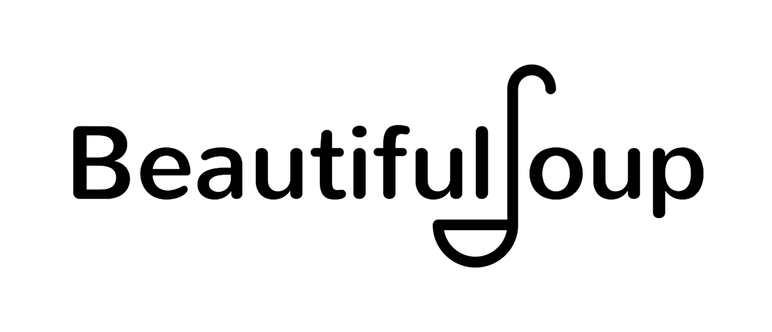

Beautiful Soup adalah suatu package python yang berguna untuk melakukan parsing suatu dokumen HTML dan XML. (termasuk markup yang salah secara struktural ataupun sistematis. Hal ini biasa disebut _tag soup_ ). Beautiful Soup membuat parse tree dari suatu webpage yang bisa digunakan untuk mengekstrak data dari HTML.

Beautiful Soup dibuat oleh Leonard Richardson, yang masih berkontribusi sampai sekarang, dan Tidelift, Management package open-source berbayar

In [ ]:
#Install beautiful soup terlebih dahulu
!pip install beautifulsoup4

# Mengambil Content

Contoh Webpage yang akan kita pakai [Here](https://keithgalli.github.io/web-scraping/example.html)

In [ ]:
import requests
from bs4 import BeautifulSoup as bs 

In [ ]:
# load webpage yang mau kita scrapping dengan request
r = requests.get('https://keithgalli.github.io/web-scraping/example.html')

#print(type(r.content))
# convert jadi object bs
soup = bs(r.content)

print(soup)

In [ ]:
#output dengan indentasi - agar lebih mudah dibaca
print(soup.prettify())

# `find` dan `find_all`

In [ ]:
soup.find('h2')

In [ ]:
soup.find_all('h2')

In [ ]:
soup.find_all(['h2', 'h1'])

In [ ]:
soup.find_all('p')

In [ ]:
# You can pass in attributes to the find/find_all function
soup.find('p', attrs={'id': 'paragraph-id'})

In [ ]:
# You can nest find/find_all calls
body = soup.find('body')
body

In [ ]:
div = body.find('div')
div

In [ ]:
header = div.find('h1')
header

In [ ]:
soup.body.i

In [ ]:
soup.body.div.h1

In [ ]:
print(soup.prettify())

## menggunakan bantuan regex

In [ ]:
import re
paragraph = soup.find_all('p', string=re.compile('Some'))
paragraph

In [ ]:
headers = soup.find_all('h2', string=re.compile('(H|h)eader'))
headers

# `select` CSS Selector
List CSS Selector : https://www.w3schools.com/cssref/css_selectors.asp

In [ ]:
content = soup.select("body p")
content

In [ ]:
paragraphs = soup.select("h2 ~ p")
paragraphs

In [ ]:
paragraphs = soup.select('body > p')
print(paragraphs)
for paragraph in paragraphs:
    print(paragraph.select('i'))

In [ ]:
par = soup.select('p#paragraph-id b')
par

In [ ]:
soup.select('[id=paragraph-id]')

# Get different properties of the HTML

In [ ]:
soup.title.get_text()

In [ ]:
soup.find('p').get_text()

In [ ]:
div

In [ ]:
div = soup.find('div')
print(div.get_text())

In [ ]:
link = soup.find('a')
link['href']

In [ ]:
par = soup.select('p#paragraph-id')[0]
par['id']

# Code Navigation

In [ ]:
print(soup.prettify())

In [ ]:
soup.body.find('div')

## `find_parent()`

In [ ]:
soup.body.find('div').find_parent()

## `find_next_siblings()` dan `find_previous_siblings()`

In [ ]:
soup.body.find("div").find_next_siblings()

In [ ]:
soup.body.find("h2").find_previous_sibling()

# Contoh

Contoh Webpage yang akan kita pakai [Here](https://keithgalli.github.io/web-scraping/webpage.html)

## Contoh 1 : Mengambil Link Media Sosial

In [ ]:
r = requests.get('https://keithgalli.github.io/web-scraping/webpage.html')
webpage = bs(r.content)

#print(webpage.prettify())

### Metode 1 : Menggunakan `find`

In [ ]:
links = webpage.find('ul', attrs={'class':'socials'})
link_list = links.find_all('a')
actual_links = [link['href'] for link in link_list]
actual_links

### Metode 2 : Menggunakan CSS Selector

In [ ]:
links = webpage.select('ul.socials a')
actual_links = [link['href'] for link in links]
actual_links

#### Bisa kita ambil dari parent-nya juga

In [ ]:
links = webpage.select("li.social a")
links

In [ ]:
links = webpage.select("body ul li.social a")
links

## Contoh 2 : Mengambil Semua Text

In [ ]:
header = webpage.body.find("h2", string="Photos")
previous_elements = header.find_previous_siblings()
previous_elements_sorted = previous_elements[::-1]
elements = [x.get_text() for x in previous_elements_sorted]
text = "\n".join(elements)
print(text)

## Contoh 3 : Mengambil Table

In [ ]:
table = webpage.select('table.hockey-stats')[0]
table
#columns = table.find('thead').find_all('th')
#column_name = [column.string for column in columns]
#column_name

In [ ]:
import pandas as pd

table_rows = table.find('tbody').find_all('tr')

l=[]
for tr in table_rows:
    td= tr.find_all('td')
    row = [txt.get_text().strip() for txt in td]
    l.append(row)
    
    
df = pd.DataFrame(l, columns=column_name)
df

## Contoh 4 : Mengambil semua fun fact yang menggunakan kata "is"

In [ ]:
import re
facts = webpage.select('ul.fun-facts li')
fact_is = [fact.find(string = re.compile('is')) for fact in facts]
fact_is

In [ ]:
fact_is_new = [fact.find_parent().get_text() for fact in fact_is if fact]
fact_is_new

## Contoh 5 : Mendownload Gambar

In [ ]:
img = webpage.select('div.row div.column img')
img

In [ ]:
url = "https://keithgalli.github.io/web-scraping/"

lake = img[1]['src']
full_url = url+lake
full_url

In [ ]:
img_data = requests.get(full_url).content
handler = open('Pontevecchio.jpg','wb')
handler.write(img_data)
handler.close()

Tutorial : https://www.youtube.com/watch?v=GjKQ6V_ViQE&t=1935s

Dokumentasi BeautifulSoup : https://www.crummy.com/software/BeautifulSoup/bs4/doc/

# Tambahan : Scraping dengan pandas

Pandas juga bisa digunakan untuk melakukan web scraping, hanya saja tidak semudah dan sebaik Beautiful Soup. Pandas sendiri hanya dapat mengesktrak data yang berupa tabel dari webpage tersebut

In [ ]:
import pandas as pd

df = pd.read_html('https://keithgalli.github.io/web-scraping/webpage.html')

In [ ]:
len(df)

In [ ]:
df[0]

In [ ]:
df = pd.read_html('https://en.wikipedia.org/wiki/Python_(programming_language)')

len(df)

In [ ]:
df[1]